In [25]:
import pandas as pd
import numpy as npt
import seaborn as sns
from matplotlib import pyplot as plt
import statistics as stat
from scipy.stats import shapiro
import plotly.graph_objs as go
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.sandbox.stats.runs import runstest_1samp

In [38]:
#Data Inflasi Umum
df_inflasiumum = pd.read_csv('./dataset/Data Inflasi Umum Bank Indonesia.csv')
df_inflasiumum = df_inflasiumum.drop(['No'], axis=1)
df_inflasiumum

,Bulan/Tahun,Data Inflasi
0,10/23,2.56 %
1,9/23,2.28 %
2,8/23,3.27 %
3,7/23,3.08 %
4,6/23,3.52 %
...,...,...
113,5/14,7.32 %
114,4/14,7.25 %
115,3/14,7.32 %
116,2/14,7.75 %


In [39]:
#Clean data, object->date and float
df_inflasiumum["Bulan/Tahun"] = pd.to_datetime(df_inflasiumum["Bulan/Tahun"], format="%m/%y")
df_inflasiumum["Data Inflasi"] = df_inflasiumum["Data Inflasi"].str.replace(" %", "")
df_inflasiumum["Data Inflasi"] = pd.to_numeric(df_inflasiumum["Data Inflasi"], errors="coerce")


df_inflasiumum

,Bulan/Tahun,Data Inflasi
0,2023-10-01,2.56
1,2023-09-01,2.28
2,2023-08-01,3.27
3,2023-07-01,3.08
4,2023-06-01,3.52
...,...,...
113,2014-05-01,7.32
114,2014-04-01,7.25
115,2014-03-01,7.32
116,2014-02-01,7.75


In [40]:
df_inflasiumum.dtypes

Bulan/Tahun     datetime64[ns]
Data Inflasi           float64
dtype: object

In [42]:
plot_inflasi = go.Scatter(
    x = df_inflasiumum['Bulan/Tahun'],
    y = df_inflasiumum['Data Inflasi'],
    mode = 'lines'
)

#atur layout
layout = {
    'title' : {
        'text' : 'Plot Awal Data Inflasi Indonesia Tahun 2014 - 2023 (%)',
        'x' : 0.5
    }
}

#buat figure
fig = go.Figure(data = plot_inflasi, layout = layout)

#tampilkan plot
fig.show()

In [2]:
#READ DATA FROM INFLASI PENDIDIKAN 2020-2023 SECTION: PENDIDIKAN
pendidikan_if2020 = pd.read_csv('./dataset/Inflasi Pendidikan 2020-Pendidikan.csv') 
pendidikan_if2020['Tahun'] = 2020
pendidikan_if2021 = pd.read_csv('./dataset/Inflasi Pendidikan 2021-Pendidikan.csv') 
pendidikan_if2021['Tahun'] = 2021
pendidikan_if2022 = pd.read_csv('./dataset/Inflasi Pendidikan 2022-Pendidikan.csv') 
pendidikan_if2022['Tahun'] = 2022
pendidikan_if2023 = pd.read_csv('./dataset/Inflasi Pendidikan 2023-Pendidikan.csv') 
pendidikan_if2023['Tahun'] = 2023

pendidikan_if2023['November'] = pendidikan_if2023['November'].fillna(0)
pendidikan_if2023['Desember'] = pendidikan_if2023['Desember'].fillna(0)
pendidikan_if2023

df_pendidikan_if_merged = pd.concat([pendidikan_if2020, pendidikan_if2021, pendidikan_if2022, pendidikan_if2023], sort=False)
df_pendidikan_if_merged.reset_index(drop=False, inplace=True)
df_pendidikan_if_merged

,index,90 Kota Inflasi (2018=100),Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Tahun
0,0,KOTA MEULABOH,0.00,0.00,0.0,0.0,0.00,0.00,1.01,0.00,0.00,0.00,0.0,0.0,2020
1,1,KOTA BANDA ACEH,0.03,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.76,0.00,0.0,0.0,2020
2,2,KOTA LHOKSEUMAWE,0.00,0.00,0.0,0.0,0.00,0.00,0.07,0.00,5.75,0.00,0.0,0.0,2020
3,3,KOTA SIBOLGA,2.58,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,2020
4,4,KOTA PEMATANG SIANTAR,0.00,0.00,0.0,0.0,0.00,0.00,0.00,3.12,0.00,0.00,0.0,0.0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,86,KOTA SORONG,0.06,0.00,0.0,0.0,0.00,0.00,0.00,-3.04,0.00,0.00,0.0,0.0,2023
360,87,MERAUKE,0.00,0.00,0.0,0.0,0.00,0.87,1.37,0.81,0.00,0.00,0.0,0.0,2023
361,88,TIMIKA,1.09,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,2023
362,89,KOTA JAYAPURA,0.00,0.00,0.0,0.0,0.00,0.00,5.18,0.00,0.00,0.00,0.0,0.0,2023


In [5]:
test = df_pendidikan_if_merged.drop(['90 Kota Inflasi (2018=100)'], axis=1)
df_pendidikan_if_merged.dtypes

index                           int64
90 Kota Inflasi (2018=100)     object
Januari                       float64
Februari                      float64
Maret                         float64
April                         float64
Mei                           float64
Juni                          float64
Juli                          float64
Agustus                       float64
September                     float64
Oktober                       float64
November                      float64
Desember                      float64
Tahun                           int64
dtype: object

In [10]:
df_pendidikan_if_merged = df_pendidikan_if_merged.drop(['index'], axis=1)

C:\Users\Nick Mathew\AppData\Local\Temp\ipykernel_19816\1820547031.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_pendidikan_if_merged[column])
c:\Users\Nick Mathew\anaconda3\envs\machine_learning\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


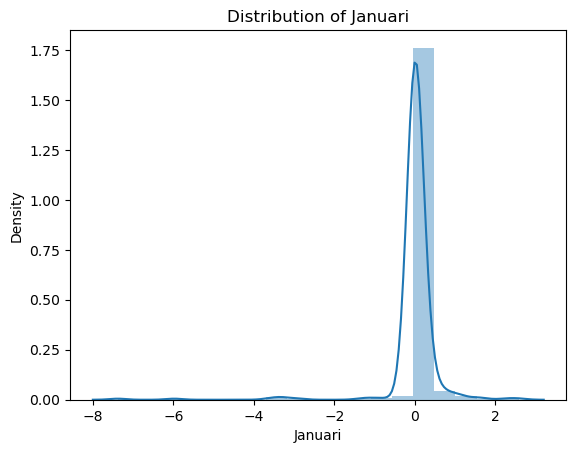

C:\Users\Nick Mathew\AppData\Local\Temp\ipykernel_19816\1820547031.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_pendidikan_if_merged[column])
c:\Users\Nick Mathew\anaconda3\envs\machine_learning\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


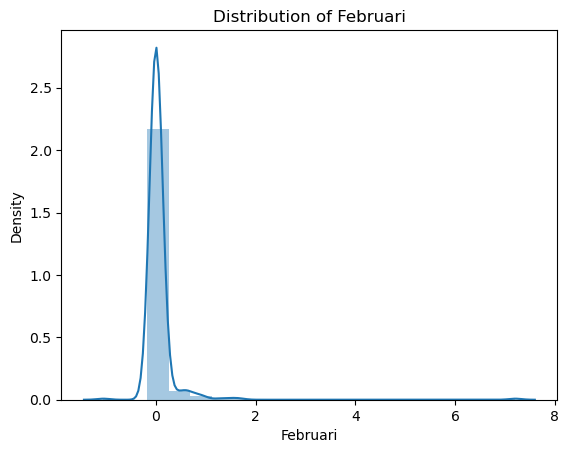

C:\Users\Nick Mathew\AppData\Local\Temp\ipykernel_19816\1820547031.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_pendidikan_if_merged[column])
c:\Users\Nick Mathew\anaconda3\envs\machine_learning\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


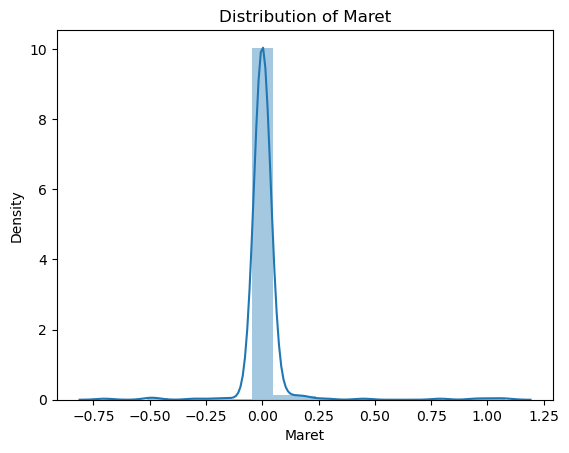

C:\Users\Nick Mathew\AppData\Local\Temp\ipykernel_19816\1820547031.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_pendidikan_if_merged[column])
c:\Users\Nick Mathew\anaconda3\envs\machine_learning\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


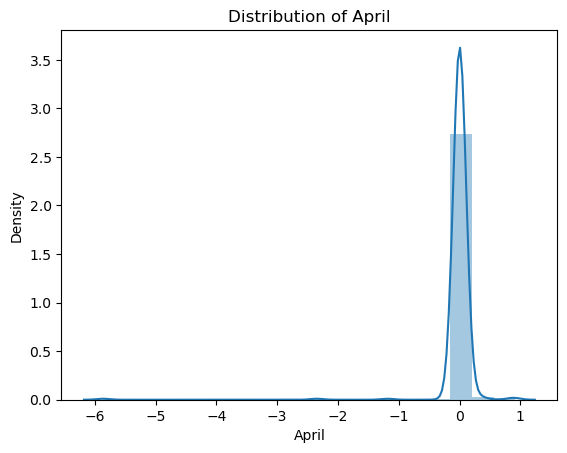

C:\Users\Nick Mathew\AppData\Local\Temp\ipykernel_19816\1820547031.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_pendidikan_if_merged[column])
c:\Users\Nick Mathew\anaconda3\envs\machine_learning\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


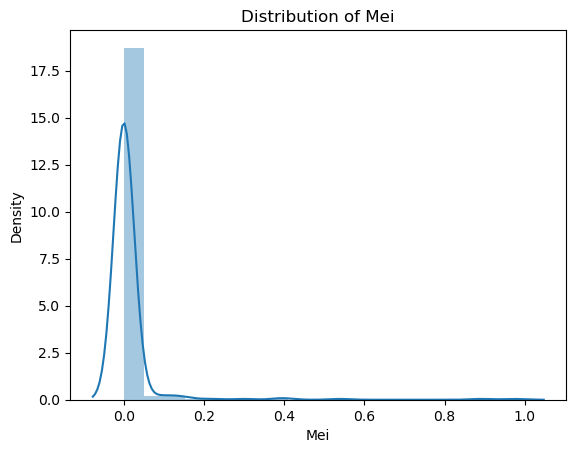

C:\Users\Nick Mathew\AppData\Local\Temp\ipykernel_19816\1820547031.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_pendidikan_if_merged[column])
c:\Users\Nick Mathew\anaconda3\envs\machine_learning\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


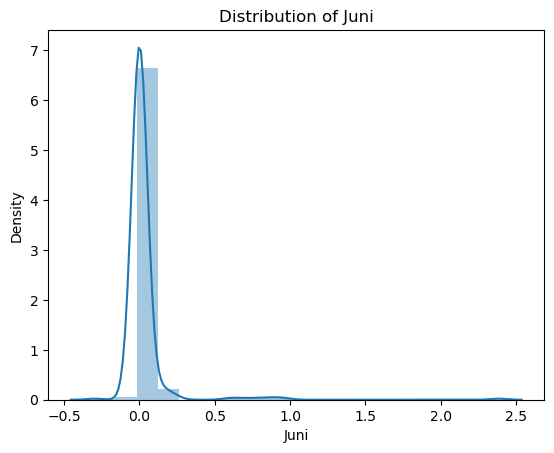

C:\Users\Nick Mathew\AppData\Local\Temp\ipykernel_19816\1820547031.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_pendidikan_if_merged[column])
c:\Users\Nick Mathew\anaconda3\envs\machine_learning\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


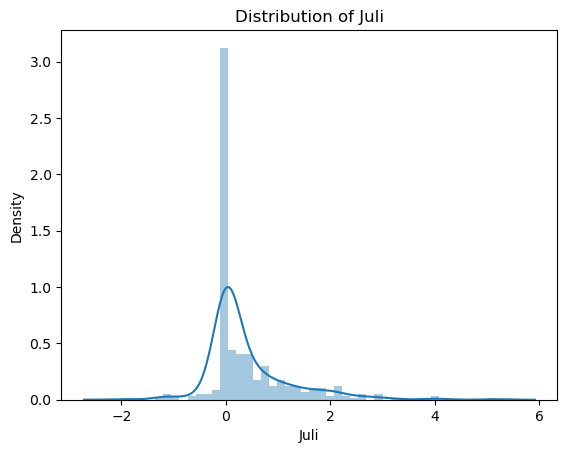

C:\Users\Nick Mathew\AppData\Local\Temp\ipykernel_19816\1820547031.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_pendidikan_if_merged[column])
c:\Users\Nick Mathew\anaconda3\envs\machine_learning\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


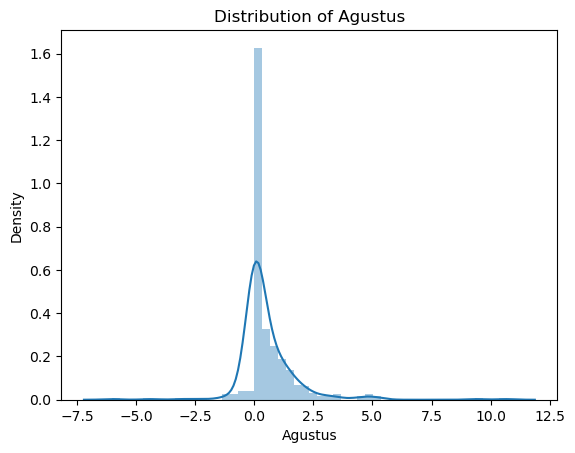

C:\Users\Nick Mathew\AppData\Local\Temp\ipykernel_19816\1820547031.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_pendidikan_if_merged[column])
c:\Users\Nick Mathew\anaconda3\envs\machine_learning\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


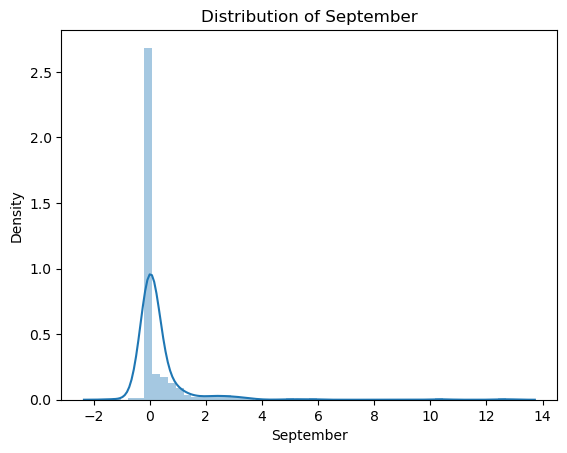

C:\Users\Nick Mathew\AppData\Local\Temp\ipykernel_19816\1820547031.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_pendidikan_if_merged[column])
c:\Users\Nick Mathew\anaconda3\envs\machine_learning\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


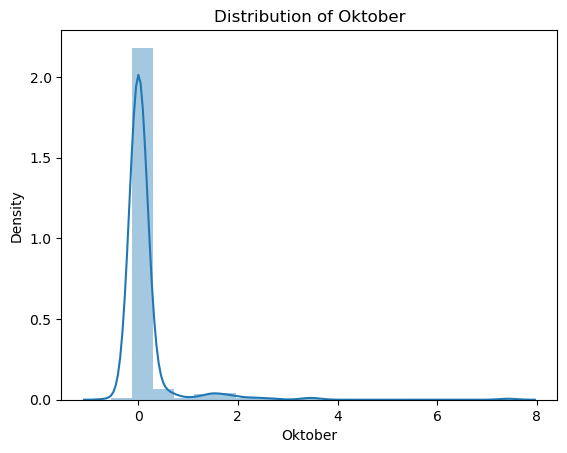

C:\Users\Nick Mathew\AppData\Local\Temp\ipykernel_19816\1820547031.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_pendidikan_if_merged[column])
c:\Users\Nick Mathew\anaconda3\envs\machine_learning\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


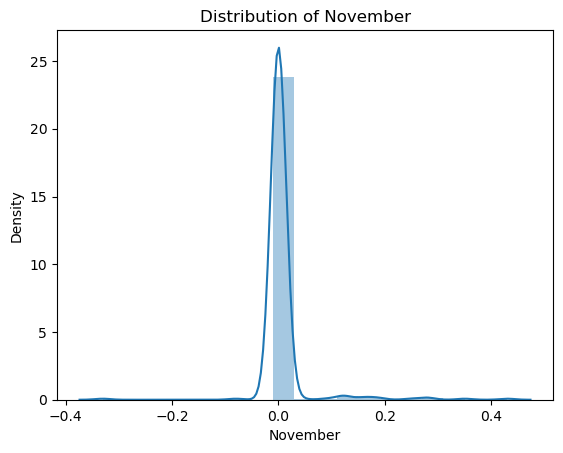

C:\Users\Nick Mathew\AppData\Local\Temp\ipykernel_19816\1820547031.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_pendidikan_if_merged[column])
c:\Users\Nick Mathew\anaconda3\envs\machine_learning\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


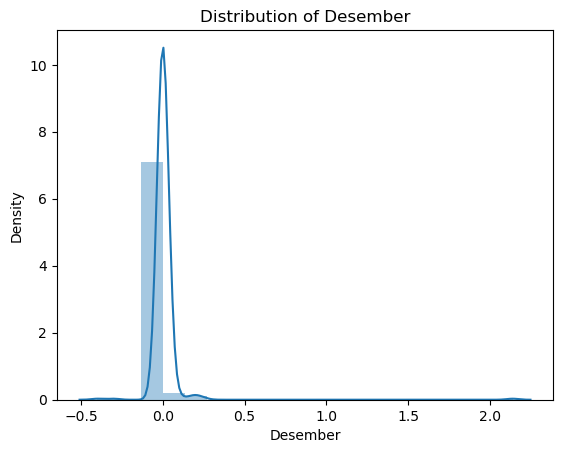

C:\Users\Nick Mathew\AppData\Local\Temp\ipykernel_19816\1820547031.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_pendidikan_if_merged[column])
c:\Users\Nick Mathew\anaconda3\envs\machine_learning\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


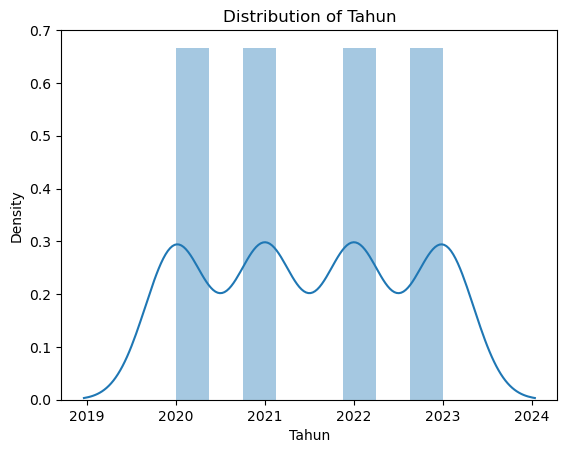

In [12]:
for column in df_pendidikan_if_merged.select_dtypes(exclude='object').columns:
    # Create a distribution plot for the current column
    sns.distplot(df_pendidikan_if_merged[column])
    plt.title(f"Distribution of {column}")
    plt.show()


In [15]:

menengah_if2020 = pd.read_csv('./dataset/Inflasi Pendidikan 2020-Menengah.csv')
menengah_if2020['Tahun'] = 2020
menengah_if2021 = pd.read_csv('./dataset/Inflasi Pendidikan 2021-Menengah.csv')
menengah_if2021['Tahun'] = 2021
menengah_if2022 = pd.read_csv('./dataset/Inflasi Pendidikan 2022-Menengah.csv')
menengah_if2022['Tahun'] = 2022
menengah_if2023 = pd.read_csv('./dataset/Inflasi Pendidikan 2023-Menengah.csv')
menengah_if2023['Tahun'] = 2023

df_menengah_if_merged = pd.concat([menengah_if2020, menengah_if2021, menengah_if2022, menengah_if2023], sort=False)
df_menengah_if_merged.reset_index(drop=False, inplace=True)
df_menengah_if_merged.dtypes

index                           int64
90 Kota Inflasi (2018=100)     object
Januari                       float64
Februari                      float64
Maret                         float64
April                         float64
Mei                           float64
Juni                          float64
Juli                          float64
Agustus                       float64
September                     float64
Oktober                       float64
November                      float64
Desember                      float64
Tahun                           int64
dtype: object

In [16]:

tinggi_if2020 = pd.read_csv('./dataset/Inflasi Pendidikan 2020-Menengah.csv')
tinggi_if2020['Tahun'] = 2020
tinggi_if2021 = pd.read_csv('./dataset/Inflasi Pendidikan 2021-Menengah.csv')
tinggi_if2021['Tahun'] = 2021
tinggi_if2022 = pd.read_csv('./dataset/Inflasi Pendidikan 2021-Menengah.csv')
tinggi_if2022['Tahun'] = 2022
tinggi_if2023 = pd.read_csv('./dataset/Inflasi Pendidikan 2021-Menengah.csv')
tinggi_if2023['Tahun'] = 2023

df_tinggi_if_merged = pd.concat([tinggi_if2020, tinggi_if2021, tinggi_if2022, tinggi_if2023], sort=False)
df_tinggi_if_merged.reset_index(drop=False, inplace=True)
df_tinggi_if_merged.dtypes

index                           int64
90 Kota Inflasi (2018=100)     object
Januari                       float64
Februari                      float64
Maret                         float64
April                         float64
Mei                           float64
Juni                          float64
Juli                          float64
Agustus                       float64
September                     float64
Oktober                       float64
November                      float64
Desember                      float64
Tahun                           int64
dtype: object

In [17]:

lainnya_if2020 = pd.read_csv('./dataset/Inflasi Pendidikan 2020-Lainnya.csv')
lainnya_if2020['Tahun'] = 2020
lainnya_if2021 = pd.read_csv('./dataset/Inflasi Pendidikan 2021-Lainnya.csv')
lainnya_if2021['Tahun'] = 2021
lainnya_if2022 = pd.read_csv('./dataset/Inflasi Pendidikan 2022-Lainnya.csv')
lainnya_if2022['Tahun'] = 2022
lainnya_if2023 = pd.read_csv('./dataset/Inflasi Pendidikan 2023-Lainnya.csv')
lainnya_if2023['Tahun'] = 2023

df_lainnya_if_merged = pd.concat([lainnya_if2020, lainnya_if2021, lainnya_if2022, lainnya_if2023], sort=False)
df_lainnya_if_merged.reset_index(drop=False, inplace=True)
df_lainnya_if_merged.dtypes

index                           int64
90 Kota Inflasi (2018=100)     object
Januari                       float64
Februari                      float64
Maret                         float64
April                         float64
Mei                           float64
Juni                          float64
Juli                          float64
Agustus                       float64
September                     float64
Oktober                       float64
November                      float64
Desember                      float64
Tahun                           int64
dtype: object

In [19]:
df_pendidikan_if_merged.isnull().sum()

index                          0
90 Kota Inflasi (2018=100)     0
Januari                        0
Februari                       0
Maret                          0
April                          0
Mei                            0
Juni                           0
Juli                           0
Agustus                        0
September                      0
Oktober                        0
November                      91
Desember                      91
Tahun                          0
dtype: int64

In [20]:
df_menengah_if_merged.isnull().sum()

index                          0
90 Kota Inflasi (2018=100)     0
Januari                        0
Februari                       0
Maret                          0
April                          0
Mei                            0
Juni                           0
Juli                           0
Agustus                        0
September                      0
Oktober                        0
November                      91
Desember                      91
Tahun                          0
dtype: int64

In [22]:
df_tinggi_if_merged.isnull().sum()

index                         0
90 Kota Inflasi (2018=100)    0
Januari                       0
Februari                      0
Maret                         0
April                         0
Mei                           0
Juni                          0
Juli                          0
Agustus                       0
September                     0
Oktober                       0
November                      0
Desember                      0
Tahun                         0
dtype: int64

In [23]:
df_lainnya_if_merged.isnull().sum()

index                          0
90 Kota Inflasi (2018=100)     0
Januari                        0
Februari                       0
Maret                          0
April                          0
Mei                            0
Juni                           0
Juli                           0
Agustus                        0
September                      0
Oktober                        0
November                      91
Desember                      91
Tahun                          0
dtype: int64